# Analysing Structured Data with PyTorch
### *Introduction to PyTorch*

---

# Predicting Credit Risk (binary classification)

## Dataset

The dataset we will be using is the German Credit Data.

The data was originally published by Professor Dr. Hans Hofmann
Institut f"ur Statistik und "Okonometrie
Universit"at Hamburg
FB Wirtschaftswissenschaften
Von-Melle-Park 5
2000 Hamburg 13

It is composed of 20 numerical variables plus the response variable.

Each observation represents a single application for a credit for an individual. The features correspond to the financial profile of the applicant.

The data dictionary can be found here: [German Credit Data Dictionary](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc)

The original dataset is avalaible from UCI: [German Credit Data](http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))


A CSV version of this dataset is avaliable here: [link](https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit/index.csv)

## Objective

Our goal is to build a Neural Network model that can predict if a new lead is creditworthy or not

## Instructions

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:
1.   Loading and Exploration of the Dataset
2.   Preparing the Dataset
3.   Defining the Architecture of the Multi-Layer Perceptron
4.   Training and Evaluation of the Model
5.   Analysing the Results

It is recommended to try adding regularization in this exercise with:
- [l2 regularizer](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#weight-decay-tuning)
- [dropout layer](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

## Exercise 3

### 1. Loading and Exploration of the Dataset

**[1.1]** Unlike the first 2 exercises, here the data is not prepared before hand. So we will need to make it ready for the modelling step. First let's import the package pandas

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd

**[1.2]** Now we will load the CSV file using [.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

**Task: Import the data into a pandas dataframe**

In [ ]:
# Placeholder for student's code

In [ ]:
# Required to download data from PSU
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Solution
df = pd.read_csv("https://online.stat.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/german_credit/index.csv")

**[1.3]** Explore the first rows of the dataframe using [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head)

**Task: Print the first 5 rows of the dataframe**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


**[1.4]** Now let's have a look at the descriptive statistics for the numerical variables using[.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)

**Task: Print the stats for all numerical variables**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


**[1.5]** We are interested in the feature 'creditability'. Let's have a look at its distribution with [.hist()](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.hist.html) and [.show()](https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.show.html?highlight=show#matplotlib.pyplot.show) from matplotlib

**Task: Print the histogram for the feature 'creditability'**

In [ ]:
# Placeholder for student's code

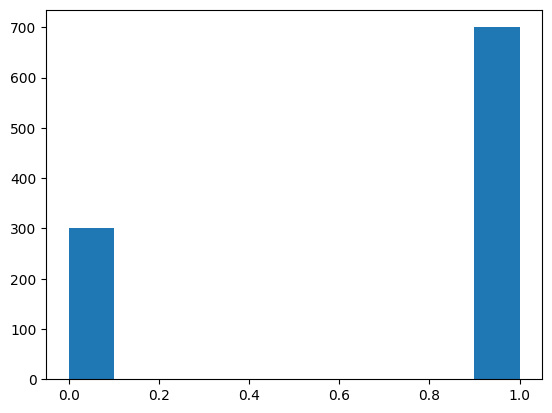

In [ ]:
# Solution
import matplotlib.pyplot as plt
plt.hist(df['Creditability'])
plt.show()

### 2.   Preparing the Dataset

**[2.1]** Now that we know what information are contained in this dataset, we need to prepare it. First we will extract the target variable creditability using [.pop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html?highlight=pop#pandas.DataFrame.pop)

**Task: Extract the feature 'creditability' and save it to a variable called y**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y = df.pop('Creditability')

**[2.2]** We need to split the data into training and testing sets. We will import the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

**[2.3]** Let's split the data using a 80/20 ratio with [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn

**Task: Split the data into training and testing sets with 20% and set the seed as 8**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train, X_test, y_train, y_test =  train_test_split(df, y, test_size=0.2, random_state=8)

**[2.4]** Let's have a look at the dimensions of the 4 variables you created

**Task: Print the dimensions of the features and target for the training and testing sets**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 20)
(200, 20)
(800,)
(200,)


**[2.5]** It is a good practise to standardise the data before training a neural net. We will import [scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html?highlight=scale#sklearn.preprocessing.scale) from sklearn


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.preprocessing import scale

**[2.6]** Let's perform standardisation on the training and testing sets using [scale()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html?highlight=scale#sklearn.preprocessing.scale) from sklearn

**Task: Standardise the training and testing sets**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
scaled_X_train = scale(X_train)
scaled_X_test = scale(X_test)

**[2.7]** Let's print the scaled version of the first observation of the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(scaled_X_train[0])

[-1.23146348  1.00545805  1.36798424 -0.30099193  0.32865798  0.57514249
 -0.30732498 -1.71451695 -0.98883806 -0.3040227   1.0606442   0.60675358
 -1.09202537  0.46460993  0.16385435  1.06145721  0.17740144 -0.43033148
 -0.81649658 -0.20077872]


Perfect! All features have the same scale now.

### 3.   Defining the Architecture of the Multi-Layer Perceptron

**[3.1]** First we need to import PyTorch and numpy

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

**[3.2]** Now we will convert data to PyTorch Tensors

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train_tensor = torch.tensor(scaled_X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(scaled_X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

**[3.3]** Then we will set the seeds for PyTorch in order to get reproducible results

In [ ]:
# Placeholder for student's code

In [ ]:
torch.manual_seed(42)

**[3.4]** We will define the l2 regularisation

**Task: Create a l2 regulariser with 0.05 as parameter**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
l2_lambda = 0.05

**[3.5]** Let's initialize the parameter of the model such as `input_size`,`hidden_size`, and `output_size`

In [ ]:
# Placeholder for student's code

In [ ]:
input_size = 20
hidden_size = 128
output_size = 1

**[3.6]** Now we will define the model architecture. In this architecture,we will create a hidden layer of 128 fully connected units with ReLU as the activation function followed by another fully connected layer responsible of making predictions.

**Task: You need to create 2 fully-connected layers with the relevant number of units and activation functions. Import the dropout class**

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
class MLP(nn.Module):    # Creating a class called MLP that inherits nn.Module
  def __init__(self, input_size, hidden_size, output_size):  # Initiazing the class
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)  # Fully connected Layer1 (input to hidden layer)
    self.relu = nn.ReLU()   # Calling Rectified Linear Unit
    self.dropout = nn.Dropout(0.5) # Dropout function is calling
    self.fc2 = nn.Linear(hidden_size, output_size) # Fully connected Layer2 (hidden layer to output)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.sigmoid(x)
    return x

**[3.7]** Initialize the argument of Multi Layer Perceptron (MLP) class by the above parameters and save it to a `model'

In [ ]:
# Placeholder for student's code

In [ ]:
model = MLP(input_size, hidden_size, output_size)

**[3.8]** Define the RMSprop (https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html) optimizer with L2 regularization.

In [ ]:
# Placeholder for student's code

In [ ]:
optimizer = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9, weight_decay=l2_lambda)

**[3.9]** Instantiate a `nn.BCELoss()` (https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) and save it into a variable called `criterion`.

In [ ]:
# Placeholder for student's code

In [ ]:
criterion = nn.BCELoss()

**[3.10]** Now the architecture is ready. Let's print the model summary.

In [ ]:
# Placeholder for student's code

In [ ]:
print(model)

MLP(
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### 4. Training and Evaluation of the Model

**[4.3]** Ok. Now it is finally time to train our model. Create a for loop that will iterate 20 times the following logics:
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- reset the gradients
- perform back propagation
- update the weights

In [ ]:
# Placeholder for student's code

In [ ]:
from sklearn.metrics import accuracy_score

num_epochs = 20
training_accuracy_values = []
test_accuracy_values = []
# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training model
    optimizer.zero_grad()  # Reset the gradients
    outputs = model(X_train_tensor)   # Forward propagation and get the model prediictions
    loss = criterion(outputs.squeeze(), y_train_tensor) # Calculate the loss between the predictions and the actuals

    loss.backward()   #Back propagation
    optimizer.step()  # Update the parameters

    # Convert predictions to binary labels (0 or 1)
    predicted_labels = (torch.round(outputs)).detach().numpy()
    true_labels = y_train_tensor.numpy()

    training_accuracy = accuracy_score(true_labels, predicted_labels) # Calculate training accuracy

    # Print training loss and accuracy
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {training_accuracy:.4f}')

    # Store training accuracy for visualization or further analysis
    training_accuracy_values.append(training_accuracy)

Epoch [1/20], Loss: 0.6622, Training Accuracy: 0.6262
Epoch [2/20], Loss: 0.6449, Training Accuracy: 0.6687
Epoch [3/20], Loss: 0.6497, Training Accuracy: 0.6763
Epoch [4/20], Loss: 0.6376, Training Accuracy: 0.6887
Epoch [5/20], Loss: 0.6289, Training Accuracy: 0.6863
Epoch [6/20], Loss: 0.6348, Training Accuracy: 0.6863
Epoch [7/20], Loss: 0.6221, Training Accuracy: 0.6937
Epoch [8/20], Loss: 0.6186, Training Accuracy: 0.6937
Epoch [9/20], Loss: 0.6193, Training Accuracy: 0.7100
Epoch [10/20], Loss: 0.6137, Training Accuracy: 0.7037
Epoch [11/20], Loss: 0.6195, Training Accuracy: 0.6925
Epoch [12/20], Loss: 0.6127, Training Accuracy: 0.7013
Epoch [13/20], Loss: 0.6076, Training Accuracy: 0.7063
Epoch [14/20], Loss: 0.6082, Training Accuracy: 0.6963
Epoch [15/20], Loss: 0.6037, Training Accuracy: 0.6937
Epoch [16/20], Loss: 0.6122, Training Accuracy: 0.6950
Epoch [17/20], Loss: 0.6060, Training Accuracy: 0.7037
Epoch [18/20], Loss: 0.6017, Training Accuracy: 0.6950
Epoch [19/20], Loss

**[4.4]** We can evaluate the performance of this model on the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Make predictions on the test data
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    predicted_probs = model(X_test_tensor)
    predicted_labels = (torch.round(predicted_probs)).detach().numpy()

y_true_numpy = y_test_tensor.numpy() # Convert true labels to numpy array

### 5. Analysing the Results

**[5.1]** Let's calculate the `accuracy` of the model by dividing the correct value with the total value and print the `accuracy`.

In [ ]:
# Placeholder for student's code

In [ ]:
test_accuracy = accuracy_score(y_true_numpy, predicted_labels)  # Calculate test accuracy
test_accuracy_values.append(test_accuracy)  # Append test accuracy to the list
print(f'Accuracy on test set: {test_accuracy:.4f}')

Accuracy on test set: 0.7150


**[5.2]** Plot the training accuracy where `ylabel` is "Accuracy" and `xlabel` is Epoch

In [ ]:
# Placeholder for student's code

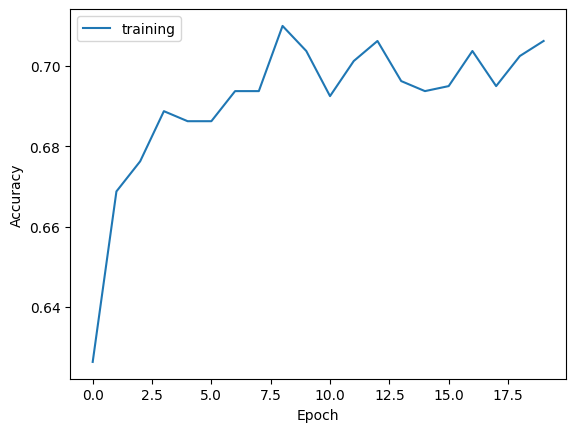

In [ ]:
import matplotlib.pyplot as plt

# Plot training and test accuracy curves
plt.plot(training_accuracy_values, label='training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()